In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py

In [2]:
%matplotlib notebook

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *
from likelihood_calculator import likelihood_analyser

In [5]:
lc_i = likelihood_analyser.LikelihoodAnalyser()

### Load data

In [8]:
foldername = r'/data/new_trap/20191104/Bead1/DMdata/'
bdf_DMdata = load_dir(foldername)
foldername = r'/data/new_trap/20191104/Bead1/DMdata2/'
bdf_DMdata2 = load_dir(foldername)

30  files in folder
30  files loaded
30  files in folder
30  files loaded


In [9]:
foldername = r'/data/new_trap/20191104/Bead1/Discharge4/'
bdf_discharge2 = load_dir(foldername)

103  files in folder
103  files loaded


<IPython.core.display.Javascript object>


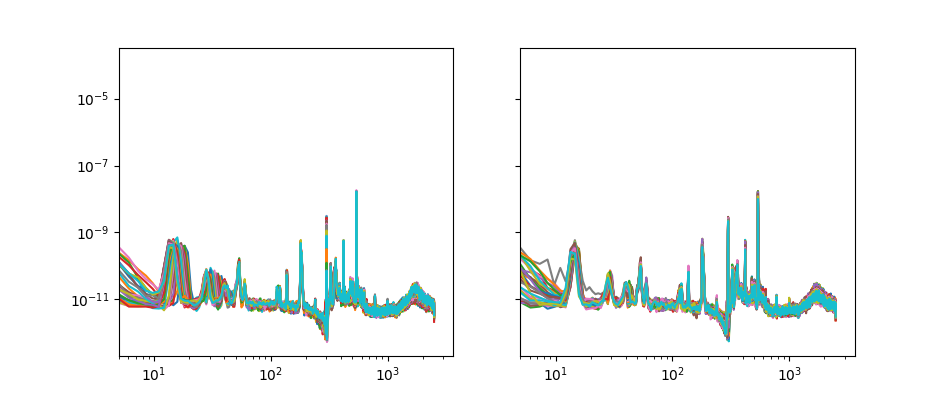

[(5, 3660.214239864062)]

In [10]:
_,ax = plt.subplots(1,2,figsize=(9.5,4), sharex=True, sharey=True)
[ax[0].loglog(*bb.welch_psd('x')) for bb in bdf_DMdata]
ax[0].set(xlim=(5,None))
[ax[1].loglog(*bb.welch_psd('x')) for bb in bdf_DMdata2]
ax[1].set(xlim=(5,None))

In [11]:
freq = bdf_discharge2[3].welch_psd('x')[0]
psds = [bb.welch_psd('x')[1] for bb in bdf_discharge2[3:]]

<IPython.core.display.Javascript object>


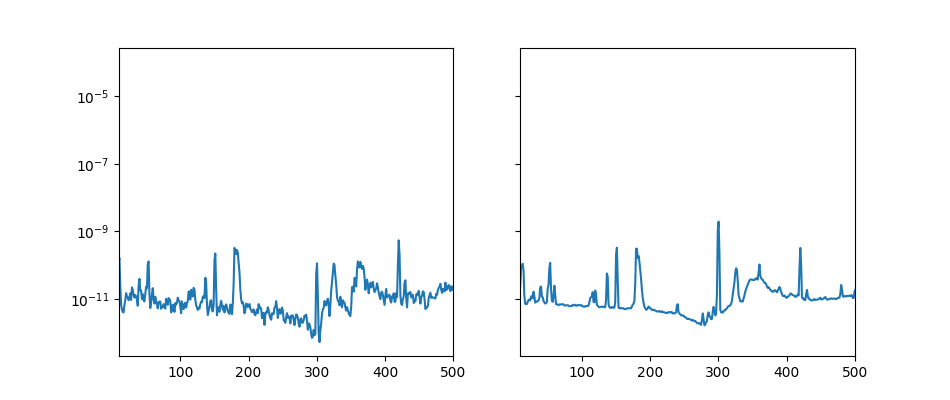

[(10, 500)]

In [12]:
bdf_sum = np.mean(psds, axis=0)
_,ax = plt.subplots(1,2,figsize=(9.5,4), sharex=True, sharey=True)
ax[0].semilogy(*bdf_discharge2[3].welch_psd('x'))
ax[1].semilogy(freq,bdf_sum)
ax[0].set(xlim=(10,500))

In [6]:
filename = r'/home/data_transfer/data_from_windows/20191107/Bead1/DMdata/Discharge_180.h5'
filename = r'/home/data_transfer/data_from_windows/20191107/Bead1/DMdata2/Discharge_110.h5'
filename = r'/data/new_trap/20191114/Bead1/DMdata_X_8/Discharge_100.h5'
# filename = r'/home/data_transfer/data_from_windows/20191112/Bead1/Discharge/Discharge_86.h5'
filename = r'/home/data_transfer/data_from_windows/20191121/Bead1/DMdata_scaleCarge/Discharge_408.h5'
bb = BeadDataFile.BeadDataFile(filename)
xx = bb.response_at_freq2('x',153, bandwidth=10)*50000
analytic_signal = signal.hilbert(xx)
amplitude_envelope = np.abs(analytic_signal)

xx3 = bb.response_at_freq3('x',153, bandwidth=10)/6
analytic_signal3 = signal.hilbert(xx3)
amplitude_envelope3 = np.abs(analytic_signal3)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


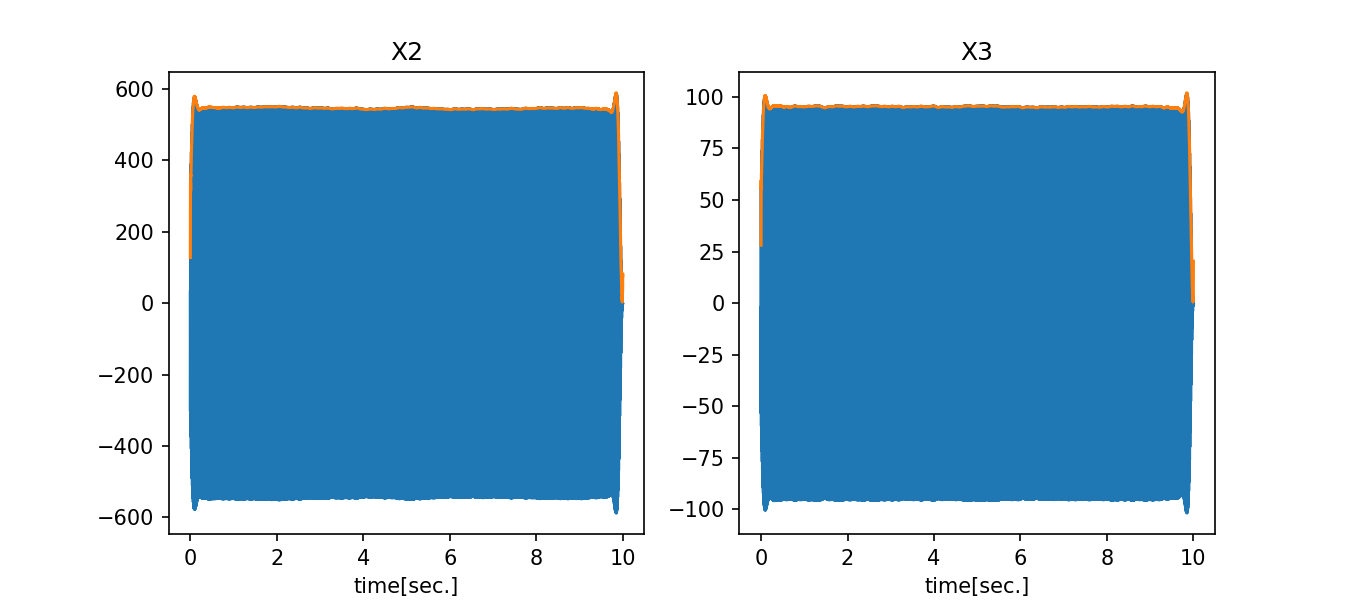

(39.09745361029662, 6.7903504222780535)

In [7]:
_,ax = plt.subplots(1,2,figsize=(9,4))
t = np.arange(50000)/5000
ax[0].plot(t, xx, label='signal')
ax[0].plot(t, amplitude_envelope, label='envelope')
ax[0].set(xlabel='time[sec.]', title='X2')

ax[1].plot(t, xx3, label='signal')
ax[1].plot(t, amplitude_envelope3, label='envelope')
ax[1].set(xlabel='time[sec.]', title='X3')

np.std(amplitude_envelope), np.std(amplitude_envelope3)

In [8]:
t_sub = t[5000:-5000]
average = np.mean(amplitude_envelope3[5000:-5000])
envelope3_subtracted = signal.detrend(amplitude_envelope3[5000:-5000])
std = np.std(envelope3_subtracted)
# std = np.std(amplitude_envelope3[5000:-5000])
# envelope3_subtracted = amplitude_envelope3-average
# envelope3_subtracted = envelope3_subtracted[5000:-5000]

In [9]:
np.mean(t_sub.reshape(-1,100),axis=1)
np.mean(np.std(envelope3_subtracted.reshape(-1,100),axis=1))

0.018858927015921446

<IPython.core.display.Javascript object>


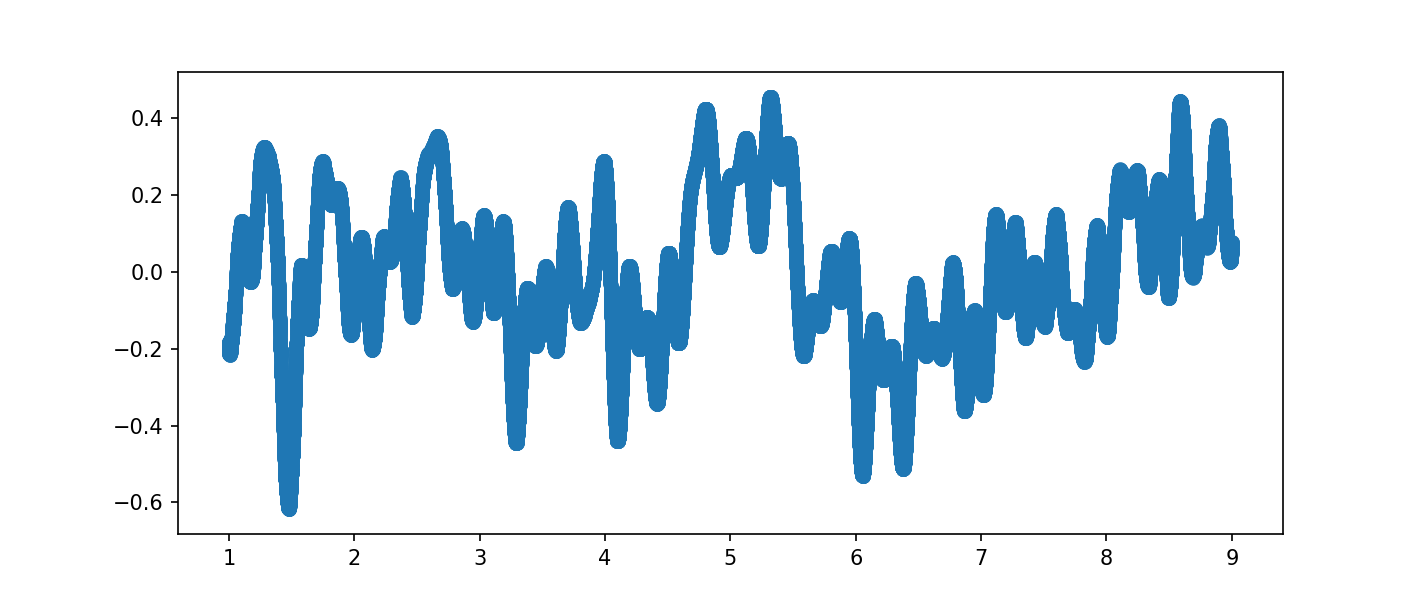

average:  95.26171298753175
std:  0.20168020750442667


In [10]:
_,ax = plt.subplots(figsize=(9.5,4))
ax.scatter(t_sub, envelope3_subtracted)
print('average: ', average)
print('std: ', std)
t_sub_avg = np.mean(t_sub.reshape(-1,50),axis=1)
envelope3_avg = np.mean(envelope3_subtracted.reshape(-1,50),axis=1)
envelope3_std = np.std(envelope3_subtracted.reshape(-1,50),axis=1)
# ax.scatter(t_sub_avg, envelope3_avg)

In [89]:
envelope3_avg.shape, 40000/50, 5000/50

((5800,), 800.0, 100.0)

Data overall time:  8.0  sec.
bandpass time:  9.5367431640625e-07
minimization time:  0.011336565017700195
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |   0.030   |   0.010   |            |            |   -1    |    1    |       |
| 1 | f    |    1.0    |    1.0    |            |            |         |         |  yes  |
| 2 | phi  |    2.5    |    0.3    |            |            |    0    | 6.28319 |       |
------------------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


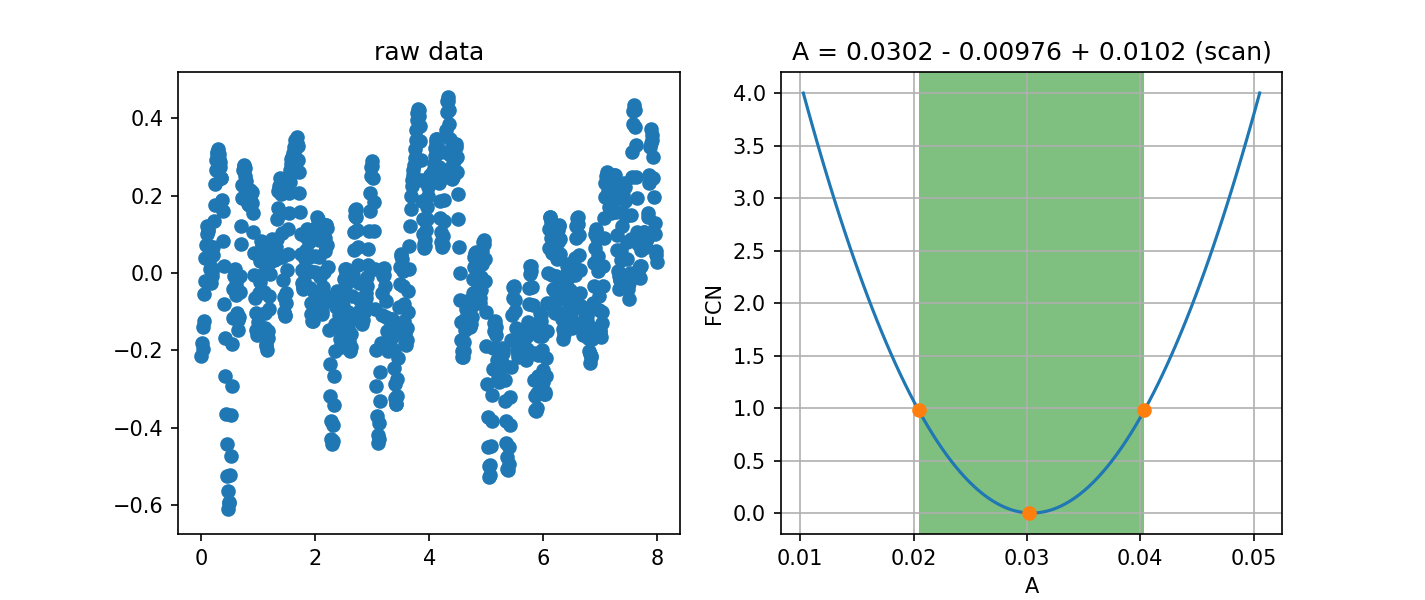

reduced chi2:  0.9951002742707744


In [14]:
freq = 1
fit_kwargs = {'A': 0, 'f': freq, 'phi': np.pi,
              'error_A': 0.01, 'error_f': 1, 'error_phi': 0.5, 'errordef': 1,
              'limit_phi': [0, 2 * np.pi], 'limit_A': [-1,1],
              'print_level': 0, 'fix_f': True, 'fix_phi': False}

empirical_rms = np.std(envelope3_avg)
m1 = lc_i.find_mle_sin(envelope3_subtracted[::50], fsamp=100, noise_rms=empirical_rms, plot=True, suppress_print=False, **fit_kwargs)

In [15]:
delta_alpha = m1.values[0]/average
print('sensitivity: ', '{:.2e}'.format(np.abs(delta_alpha)))

sensitivity:  3.19e-04


In [16]:
foldername = r'/data/new_trap/20191107/Bead1/DMdata/'
bdf_DMdata_7 = load_dir(foldername)

200  files in folder
200  files loaded


In [7]:
foldername = r'/data/new_trap/20191121/Bead1/DMdata_X9/'
BDFs = load_dir(foldername, file_prefix='DMdata')

119  files in folder
119  files loaded


<IPython.core.display.Javascript object>


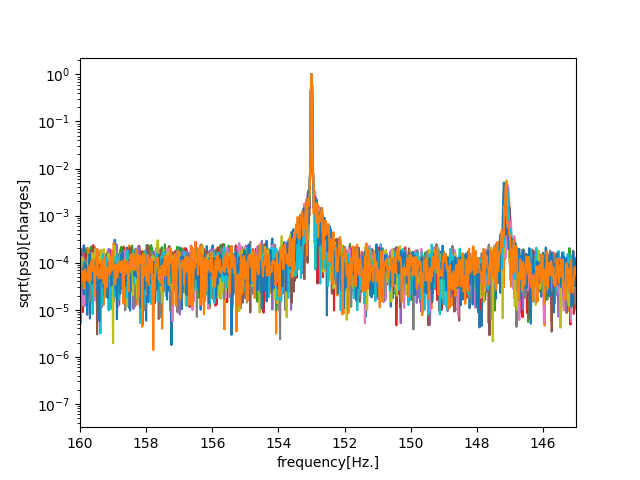

[Text(0, 0.5, 'sqrt(psd)[charges]'),
 (160, 145),
 Text(0.5, 0, 'frequency[Hz.]')]

In [14]:
_,ax = plt.subplots()
for bb in BDFs[:12]:
    fft3, freq3 = matplotlib.mlab.psd(bb.x3,Fs=5000, detrend='linear', NFFT=300000)
    fft3 /= fft3[freq3==153]
    ax.semilogy(freq3, np.sqrt(fft3))
ax.set(xlim=(160,145), xlabel='frequency[Hz.]', ylabel='sqrt(psd)[charges]')

In [250]:
foldername = r'/home/data_transfer/data_from_windows/20191114/Bead1/DMadata_X_2/'
foldername = r'/data/new_trap/20191114/Bead1/DMdata_X_8/'
foldername = r'/home/data_transfer/data_from_windows/20191121/Bead1/Discharge/'
foldername = r'/home/data_transfer/data_from_windows/20191121/Bead1/DMdata_X/'
# foldername = r'/home/data_transfer/data_from_windows/20191121/Bead1/DMdata_scaleCarge/'
BDFs = load_dir(foldername)

128  files in folder
128  files loaded


In [235]:
x_value = np.array([np.mean(bb.x2) for bb in BDFs])

<IPython.core.display.Javascript object>


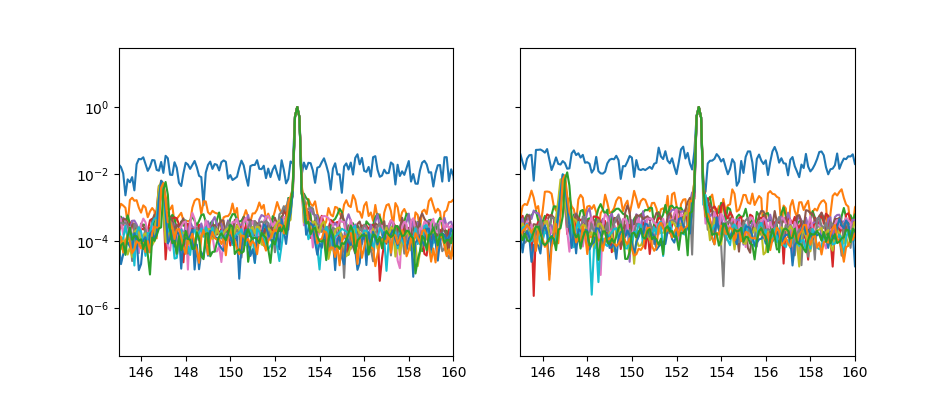

[(145, 160)]

In [241]:
_,ax = plt.subplots(1,2,figsize=(9.5,4), sharey=True, sharex=True)
for bb in BDFs:
    fft, freq = matplotlib.mlab.psd(bb.x2,Fs=5000, detrend='linear', NFFT=50000)
    fft3, freq3 = matplotlib.mlab.psd(bb.x3,Fs=5000, detrend='linear', NFFT=50000)
    fft_c, freq = matplotlib.mlab.csd(bb.x2, bb.x3,Fs=5000, detrend='linear', NFFT=50000)
    fft /= fft[freq==153]
    fft_c /= fft_c[freq==153]
    fft3 /= fft3[freq==153]
    ax[0].semilogy(freq, np.sqrt(fft))
    ax[1].semilogy(freq, np.sqrt(fft3))
ax[0].set(xlim=(145,160))
ax[1].set(xlim=(145,160))

In [31]:
## fit all data
m1_all = []
# t_sub = t[5000:-5000]
freq = 1
averages = []
fit_kwargs = {'A': 1.6, 'f': freq, 'phi': np.pi,
              'error_A': 0.01, 'error_f': 1, 'error_phi': 0.5, 'errordef': 1,
              'limit_phi': [0, 2*np.pi], 'limit_A': [-5,5],
              'print_level': 0, 'fix_f': True, 'fix_phi': False, 'fix_A': False}

for i,bb in enumerate(BDFs):
    xx3 = bb.response_at_freq3('x',151, bandwidth=10)/6
    analytic_signal3 = signal.hilbert(xx3)
    amplitude_envelope3 = np.abs(analytic_signal3)
    
    average = np.mean(amplitude_envelope3[5000:-5000])
    std = np.std(amplitude_envelope3[5000:-5000])
    envelope3_subtracted = amplitude_envelope3-average
    envelope3_subtracted = envelope3_subtracted[5000:-5000]
    
    empirical_rms = std
    m1_tmp = lc_i.find_mle_sin(envelope3_subtracted[::100], fsamp=50, noise_rms=empirical_rms, plot=False, suppress_print=False, **fit_kwargs)
    delta_alpha = m1_tmp.values[0]/average
    print(i, 'sensitivity: ', '{:.2e}'.format(np.abs(delta_alpha)))
    m1_all.append(m1_tmp)
    averages.append(average)
averages = np.array(averages)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


Data overall time:  58.0  sec.
bandpass time:  1.6689300537109375e-06
minimization time:  0.013724803924560547
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |   0.03    |   0.03    |            |            |   -5    |    5    |       |
| 1 | f    |    1.0    |    1.0    |            |            |         |         |  yes  |
| 2 | phi  |    2.9    |    1.0    |            |            |    0    | 6.28319 |       |
------------------------------------------------------------------------------------------
reduced chi2:  1.0006862710257556
0 sensitivity:  1.74e-04
Data overall time:  58.0  sec.
bandpass time:  1.9073486328125e-06
minimization time:  0.013725042343139648
-------------------------------------------------------------------------------------

Data overall time:  58.0  sec.
bandpass time:  1.430511474609375e-06
minimization time:  0.023852825164794922
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |   0.016   |   0.025   |            |            |   -5    |    5    |       |
| 1 | f    |    1.0    |    1.0    |            |            |         |         |  yes  |
| 2 | phi  |     6     |     3     |            |            |    0    | 6.28319 |       |
------------------------------------------------------------------------------------------
reduced chi2:  1.0005711307191907
16 sensitivity:  8.30e-05
Data overall time:  58.0  sec.
bandpass time:  1.430511474609375e-06
minimization time:  0.017365694046020508
-----------------------------------------------------------------------------------

Data overall time:  58.0  sec.
bandpass time:  1.9073486328125e-06
minimization time:  0.019915342330932617
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |   0.019   |   0.034   |            |            |   -5    |    5    |       |
| 1 | f    |    1.0    |    1.0    |            |            |         |         |  yes  |
| 2 | phi  |   0.023   |   5.488   |            |            |    0    | 6.28319 |       |
------------------------------------------------------------------------------------------
reduced chi2:  1.0000329192127155
27 sensitivity:  1.03e-04
Data overall time:  58.0  sec.
bandpass time:  1.430511474609375e-06
minimization time:  0.024664878845214844
-------------------------------------------------------------------------------------

Data overall time:  58.0  sec.
bandpass time:  1.430511474609375e-06
minimization time:  0.012174844741821289
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |   0.006   |   0.058   |            |            |   -5    |    5    |       |
| 1 | f    |    1.0    |    1.0    |            |            |         |         |  yes  |
| 2 | phi  |     3     |     3     |            |            |    0    | 6.28319 |       |
------------------------------------------------------------------------------------------
reduced chi2:  1.0007478201765059
43 sensitivity:  2.98e-05
Data overall time:  58.0  sec.
bandpass time:  1.1920928955078125e-06
minimization time:  0.012884855270385742
----------------------------------------------------------------------------------

Data overall time:  58.0  sec.
bandpass time:  1.430511474609375e-06
minimization time:  0.024456262588500977
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |  -0.058   |   0.022   |            |            |   -5    |    5    |       |
| 1 | f    |    1.0    |    1.0    |            |            |         |         |  yes  |
| 2 | phi  |    4.7    |    0.4    |            |            |    0    | 6.28319 |       |
------------------------------------------------------------------------------------------
reduced chi2:  0.998211737337559
59 sensitivity:  3.11e-04
Data overall time:  58.0  sec.
bandpass time:  9.5367431640625e-07
minimization time:  0.018637895584106445
--------------------------------------------------------------------------------------

minimization time:  0.017794132232666016
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |   0.020   |   0.032   |            |            |   -5    |    5    |       |
| 1 | f    |    1.0    |    1.0    |            |            |         |         |  yes  |
| 2 | phi  |    1.1    |    1.5    |            |            |    0    | 6.28319 |       |
------------------------------------------------------------------------------------------
reduced chi2:  1.0005340012026571
74 sensitivity:  1.05e-04
Data overall time:  58.0  sec.
bandpass time:  1.9073486328125e-06
minimization time:  0.015771150588989258
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | 

Data overall time:  58.0  sec.
bandpass time:  1.9073486328125e-06
minimization time:  0.03847694396972656
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |  -0.027   |   0.027   |            |            |   -5    |    5    |       |
| 1 | f    |    1.0    |    1.0    |            |            |         |         |  yes  |
| 2 | phi  |    1.4    |    1.0    |            |            |    0    | 6.28319 |       |
------------------------------------------------------------------------------------------
reduced chi2:  1.0005057065375509
90 sensitivity:  1.45e-04
Data overall time:  58.0  sec.
bandpass time:  1.430511474609375e-06
minimization time:  0.014713525772094727
--------------------------------------------------------------------------------------

Data overall time:  58.0  sec.
bandpass time:  1.6689300537109375e-06
minimization time:  0.026909828186035156
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | A    |   0.027   |   0.032   |            |            |   -5    |    5    |       |
| 1 | f    |    1.0    |    1.0    |            |            |         |         |  yes  |
| 2 | phi  |     6     |     6     |            |            |    0    | 6.28319 |       |
------------------------------------------------------------------------------------------
reduced chi2:  1.0005125569041302
105 sensitivity:  1.45e-04
Data overall time:  58.0  sec.
bandpass time:  1.430511474609375e-06
minimization time:  0.025463342666625977
---------------------------------------------------------------------------------

<IPython.core.display.Javascript object>


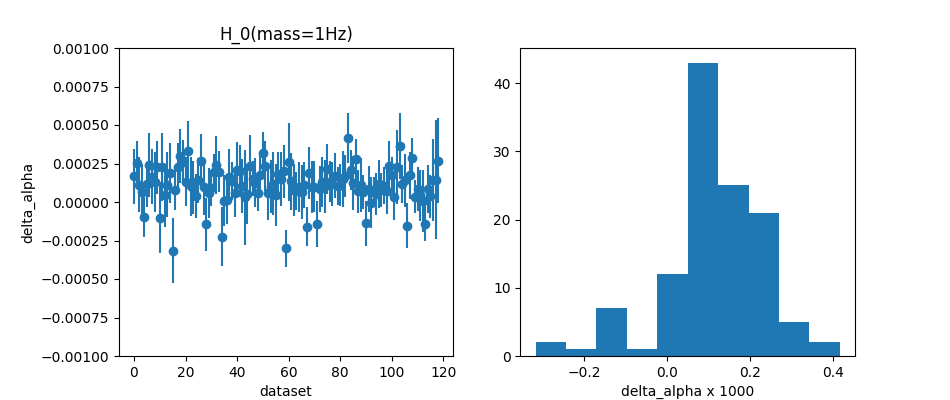

avergae:  0.00011110414466660804 std:  0.00012226224863077042
standard error:  1.1207761956311674e-05


[Text(0.5, 0, 'delta_alpha x 1000')]

In [32]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
all_vals = np.array([m_.values[0] for m_ in m1_all])
all_vals /= average
all_errors = np.array([m_.errors[0] for m_ in m1_all])
all_errors /= averages
ax[0].errorbar(range(len(all_vals)), all_vals, all_errors, fmt='o')
print('avergae: ', np.mean(all_vals), 'std: ', np.std(all_vals))
print('standard error: ', np.std(all_vals)/np.sqrt(len(all_vals)))
ax[0].set(ylabel='delta_alpha', xlabel='dataset', title='H_0(mass=1Hz)', ylim=(-0.001, 0.001))
ax[1].hist(all_vals*1000)
ax[1].set(xlabel='delta_alpha x 1000')

In [181]:
resp_x2 = [np.std(bb.response_at_freq2('x',drive_freq=153,bandwidth=1)) for bb in BDFs]
resp_x3 = [np.std(bb.response_at_freq3('x',drive_freq=153,bandwidth=1)) for bb in BDFs]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


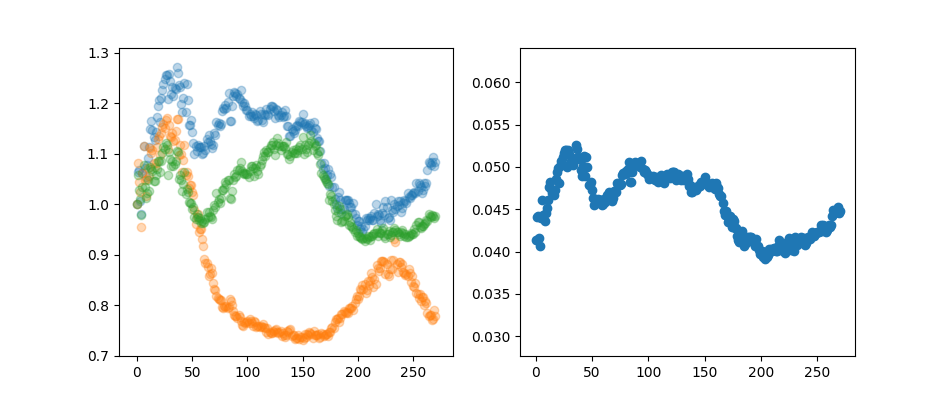

In [184]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].scatter(range(len(x_value)),x_value/x_value[0], alpha= 0.3, label='x-mean scaled')
ax[0].scatter(range(len(x_value)),resp_x2/resp_x2[0], alpha= 0.3, label='x2-response scaled')
ax[0].scatter(range(len(x_value)),resp_x3/resp_x3[0], alpha= 0.3, label='x3-response scaled')
ax[1].scatter(range(len(x_value)), x_value)

In [77]:
## fit all data - x2 and x3
m2_all = []
t_sub = t[5000:-5000]
freq = 1

for i,bb in enumerate(bdf_DMdata2_7):
    xx3 = bb.response_at_freq3('x',151, bandwidth=10)/6
    analytic_signal3 = signal.hilbert(xx3)
    amplitude_envelope3 = np.abs(analytic_signal3)
    average3 = np.mean(amplitude_envelope3[5000:-5000])
    std3 = np.std(amplitude_envelope3[5000:-5000])
    envelope3_subtracted = amplitude_envelope3-average3
    envelope3_subtracted = envelope3_subtracted[5000:-5000]
    
    xx2 = bb.response_at_freq2('x',151, bandwidth=10)*50000
    analytic_signal2 = signal.hilbert(xx2)
    amplitude_envelope2 = np.abs(analytic_signal2)
    average2 = np.mean(amplitude_envelope2[5000:-5000])
    std2 = np.std(amplitude_envelope2[5000:-5000])
    envelope2_subtracted = amplitude_envelope2-average2
    envelope2_subtracted = envelope2_subtracted[5000:-5000]
    
    fit_kwargs = {'A': 0, 'f': freq, 'phi': 0, 'A2': average2/average3, 'f2': freq, 'delta_phi': 0,
              'error_A': 0.01, 'error_f': 1, 'error_phi': 0.1, 'errordef': 1,
              'error_A2': 2, 'error_f2': 10, 'error_delta_phi': 0.1,
              'limit_phi': [0, 2 * np.pi],'limit_delta_phi': [-0.1, 0.1],
              'limit_A': [-1,1], #'limit_A2': [1.8,2.2],
              'print_level': 0, 'fix_f': True, 'fix_phi': False, 'fix_f2': True, 'fix_delta_phi': True, 'fix_A2': True}

    empirical_rms = 1
    m1_tmp = lc_i.find_mle_2sin(envelope3_subtracted, envelope2_subtracted, fsamp=5000, noise_rms=std3, noise_rms2=std2,
                                plot=False, suppress_print=False, **fit_kwargs)
    delta_alpha = m1_tmp.values[0]/average3
    print(i, 'sensitivity: ', '{:.2e}'.format(np.abs(delta_alpha)))
    m2_all.append(m1_tmp)

NameError: name 'bdf_DMdata2_7' is not defined

<IPython.core.display.Javascript object>


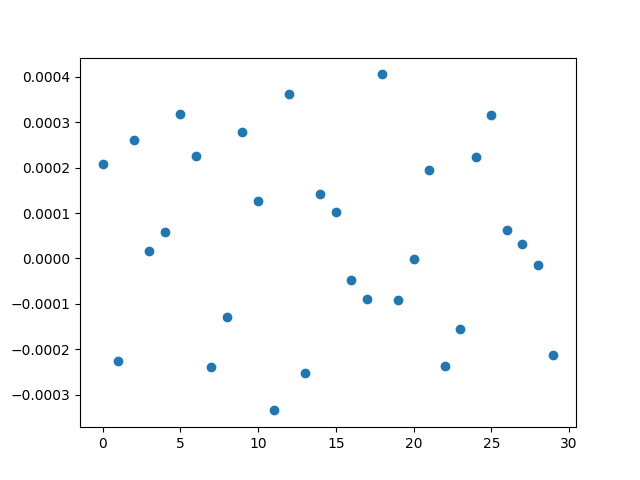

avergae:  4.325902091081662e-05 std:  0.0002054982843354108
standard error:  3.751868195303834e-05


In [58]:
_,ax = plt.subplots()
all_vals = [m_.values[0]/average3 for m_ in m2_all]
all_errors = np.array([m_.errors[0]/average for m_ in m2_all])/1000
ax.errorbar(range(30), all_vals, all_errors, fmt='o')
print('avergae: ', np.mean(all_vals), 'std: ', np.std(all_vals))
print('standard error: ', np.std(all_vals)/np.sqrt(len(all_vals)))

<IPython.core.display.Javascript object>


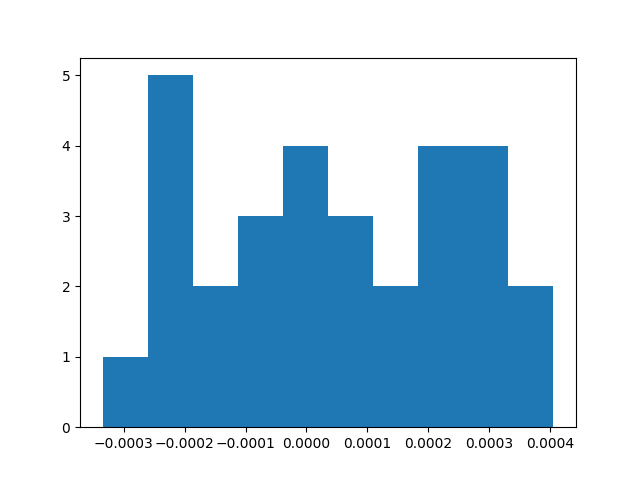

(array([1., 5., 2., 3., 4., 3., 2., 4., 4., 2.]),
 array([-3.34658973e-04, -2.60671034e-04, -1.86683094e-04, -1.12695155e-04,
        -3.87072150e-05,  3.52807245e-05,  1.09268664e-04,  1.83256604e-04,
         2.57244543e-04,  3.31232483e-04,  4.05220422e-04]),
 <a list of 10 Patch objects>)

In [63]:
_,ax = plt.subplots()
ax.hist(all_vals)